In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Experiment 1: Compare strategies

In [22]:
RESULT_PATH = "../result/result_strategies.csv"

df_result = pd.read_csv(
    filepath_or_buffer=RESULT_PATH
)

df_loss = pd.DataFrame(index=sorted(df_result['round'].unique()))
df_accuracy = pd.DataFrame(index=sorted(df_result['round'].unique()))


# for strategy in df_result['strategy'].unique():
#     df = df_result[df_result['strategy'] == strategy].sort_values(by=['round'])
#     df_loss[strategy] = df['c_loss'].values
#     df_accuracy[strategy] = df['c_accuracy'].values


# df_loss = df_loss.drop(['FedAdagrad', 'FedAdam'], axis=1)
# df_accuracy = df_accuracy.drop(['FedAdagrad', 'FedAdam'], axis=1)


rounds = sorted(df_result['round'].unique())

df_loss = pd.DataFrame(index=rounds)
df_accuracy = pd.DataFrame(index=rounds)
df_recall = pd.DataFrame(index=rounds)
df_precision = pd.DataFrame(index=rounds)
df_f1 = pd.DataFrame(index=rounds)



for strategy in df_result['strategy'].unique():

    df = df_result[df_result['strategy'] ==strategy].sort_values(by=['round'])
    df_loss[strategy] = df['c_loss'].values
    df_accuracy[strategy] = df['c_accuracy'].values
    df_recall[strategy] = df['c_recall'].values
    df_precision[strategy] = df['c_precision'].values
    df_f1[strategy] = df['c_f1_score'].values


Text(0, 0.5, 'F1-score')

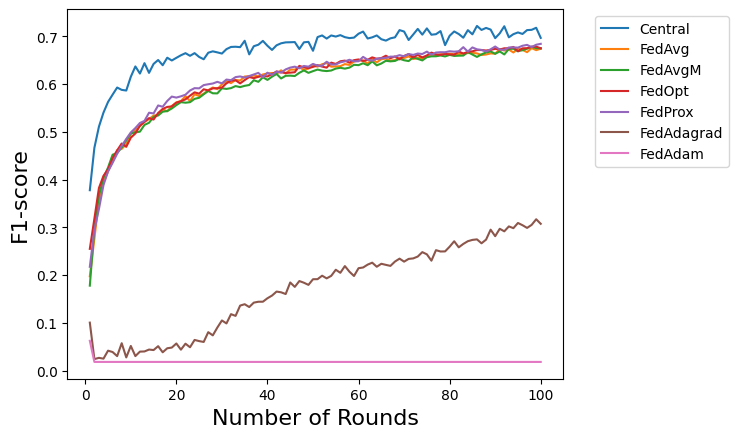

In [23]:
fig, ax = plt.subplots()
for strategy in df_f1.columns:
    ax.plot(
        rounds, 
        df_f1[strategy].values,
        label=strategy,
    )

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_xlabel("Number of Rounds", fontsize=16)
ax.set_ylabel("F1-score", fontsize=16)

Text(0, 0.5, 'Accuracy')

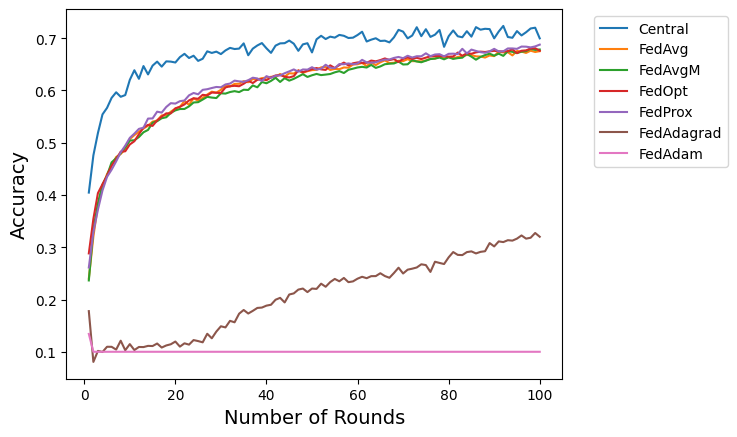

In [5]:
fig, ax = plt.subplots()
for strategy in df_accuracy.columns:
    ax.plot(
        rounds, 
        df_accuracy[strategy].values,
        label=strategy,
    )

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_xlabel("Number of Rounds", fontsize=14)
ax.set_ylabel("Accuracy", fontsize=14)

# Experiment 2: Change FL scale

* Use pretrained model to initialize the global model in FL system
* The number of data for pre-train : 10,000
* Define `fl_scale` as ratio of (The number of data for FL clients) / (The number of data for pre-train)
    * Compare with cases in which the fl_scale is 0.25, 0.5, 1, 2, or 4.
    * \[Example\] if fl_scale is 0.25,  The number of data used in FL clients is 2,500

In [24]:
RESULT_PATH = "../result/result_exp_fl_scale.csv"

df_result = pd.read_csv(
    filepath_or_buffer=RESULT_PATH
)

rounds = sorted(df_result['round'].unique())

df_loss = pd.DataFrame(index=rounds)
df_accuracy = pd.DataFrame(index=rounds)
df_recall = pd.DataFrame(index=rounds)
df_precision = pd.DataFrame(index=rounds)
df_f1 = pd.DataFrame(index=rounds)

df_fedavg = df_result[df_result['strategy'] == 'FedAvg']

for scale in df_fedavg['fl_scale'].unique():
    num_fl_data = f"{int(10000 * scale):,}"

    df = df_fedavg[df_fedavg['fl_scale'] == scale].sort_values(by=['round'])
    df_loss[num_fl_data] = df['c_loss'].values
    df_accuracy[num_fl_data] = df['c_accuracy'].values
    df_recall[num_fl_data] = df['c_recall'].values
    df_precision[num_fl_data] = df['c_precision'].values
    df_f1[num_fl_data] = df['c_f1_score'].values


Text(0, 0.5, 'F1-score')

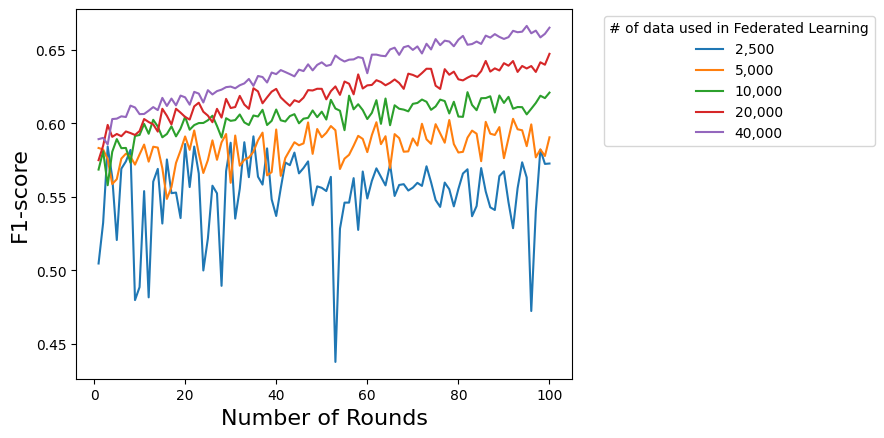

In [25]:

fig, ax = plt.subplots()
for num_fl_data in df_f1.columns:
    ax.plot(
        rounds, 
        df_f1[num_fl_data].values,
        label=num_fl_data,
    )

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title="# of data used in Federated Learning")
ax.set_xlabel("Number of Rounds", fontsize=16)
ax.set_ylabel("F1-score", fontsize=16)

Text(0, 0.5, 'Loss')

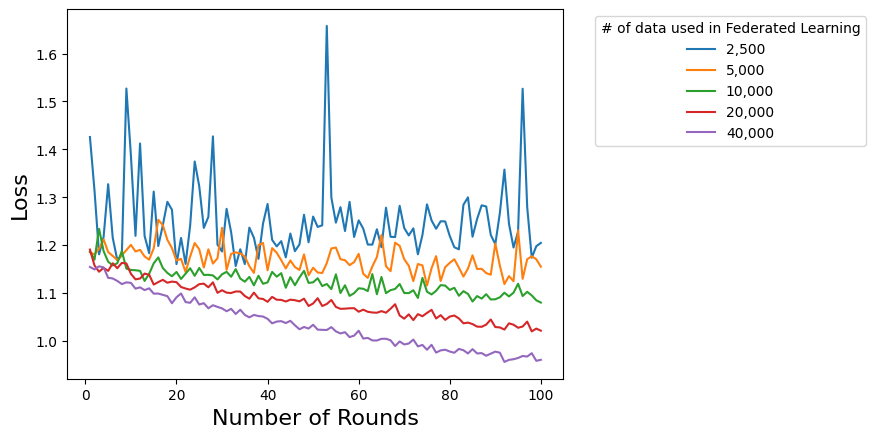

In [26]:

fig, ax = plt.subplots()
for num_fl_data in df_loss.columns:
    ax.plot(
        rounds, 
        df_loss[num_fl_data].values,
        label=num_fl_data,
    )

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title="# of data used in Federated Learning")
ax.set_xlabel("Number of Rounds", fontsize=16)
ax.set_ylabel("Loss", fontsize=16)

# Experiment 3: Compare models

In [28]:
#RESULT_PATH = "../result/result_exp_model.csv"
RESULT_PATH = "../result/result_model.csv"

df_result = pd.read_csv(
    filepath_or_buffer=RESULT_PATH
)

df_result["name"] = df_result["model"] + "_" + df_result["Centralized"]
df_result.drop(columns=['model', 'Centralized'], inplace=True)

rounds = sorted(df_result['round'].unique())

df_loss = pd.DataFrame(index=rounds)
df_accuracy = pd.DataFrame(index=rounds)
df_recall = pd.DataFrame(index=rounds)
df_precision = pd.DataFrame(index=rounds)
df_f1 = pd.DataFrame(index=rounds)


for name in df_result['name'].unique():

    df = df_result[df_result['name'] == name].sort_values(by=['round'])
    df_loss[name] = df['c_loss'].values
    df_accuracy[name] = df['c_accuracy'].values
    df_recall[name] = df['c_recall'].values
    df_precision[name] = df['c_precision'].values
    df_f1[name] = df['c_f1_score'].values


In [5]:
print(df_f1.columns)

Index(['Densenet121_Centralized', 'Densenet121_Federated',
       'Mobilenet_v2_Centralized', 'Mobilenet_v2_Federated',
       'Googlenet_Centralized', 'Googlenet_Federated', 'Resnet18_Centralized',
       'Resnet18_Federated', 'Resnet34_Centralized', 'Resnet34_Federated',
       'Resnet50_Centralized', 'Resnet50_Federated', 'VGG11_Centralized',
       'VGG11_Federated', 'VGG13_Centralized', 'VGG13_Federated',
       'VGG16_Centralized', 'VGG16_Federated', 'VGG19_Centralized',
       'VGG19_Federated'],
      dtype='object')


Text(0, 0.5, 'F1-score')

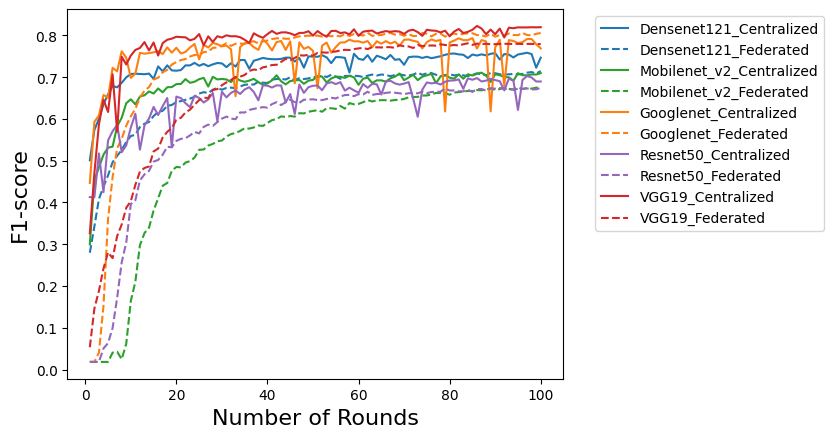

In [29]:
targets = [
    'Densenet121_Centralized', 'Densenet121_Federated','Mobilenet_v2_Centralized', 'Mobilenet_v2_Federated',
    'Googlenet_Centralized', 'Googlenet_Federated', 'Resnet50_Centralized', 'Resnet50_Federated',
    'VGG19_Centralized', 'VGG19_Federated'
]

colors = {
    'Densenet121_Centralized': 'tab:blue',
    'Densenet121_Federated': 'tab:blue',
    'Mobilenet_v2_Centralized': 'tab:green',
    'Mobilenet_v2_Federated': 'tab:green',
    'Googlenet_Centralized': 'tab:orange',
    'Googlenet_Federated': 'tab:orange',    
    'Resnet50_Centralized': 'tab:purple',
    'Resnet50_Federated': 'tab:purple',
    'VGG19_Centralized': 'tab:red',
    'VGG19_Federated': 'tab:red',
}


fig, ax = plt.subplots()
for name in targets:
    ax.plot(
        rounds, 
        df_f1[name].values,
        color=colors[name],
        linestyle='dashed' if 'Federated' in name else 'solid',
        #marker='D' if 'Federated' in name else 'o',
        label=name,
    )

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_xlabel("Number of Rounds", fontsize=16)
ax.set_ylabel("F1-score", fontsize=16)